In [2]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32  #i9assamlek el data elli bech ie5dem aliha koll marra el 32 image wiregroupih mab34hom wi5dm alihom
CHANNELS = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

NotFoundError: Could not find directory PlantVillage

In [ ]:
class_names = dataset.class_names
class_names
#3anna 3 classe nrepresentiwhom b 0 ,1 ,2

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)
#donc felle5er net7asslou ala 68 batch wkoll batch fih 32 image

68

In [ ]:
for image_batch , label_batch in dataset.take(1):
    print(image_batch.shape) #32 image size mte3hom 256 wfiha les 3 couleurs rgb
    print(label_batch.numpy()) #koll image 3ndha classe 0 ,1 ,2
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[0 1 1 1 1 1 0 2 1 0 0 1 0 0 0 1 0 2 0 1 1 0 2 1 0 1 1 0 1 0 0 1]
[[[176. 178. 190.]
  [173. 175. 187.]
  [173. 175. 187.]
  ...
  [187. 191. 203.]
  [186. 190. 202.]
  [186. 190. 202.]]

 [[176. 178. 190.]
  [172. 174. 186.]
  [172. 174. 186.]
  ...
  [187. 191. 203.]
  [186. 190. 202.]
  [186. 190. 202.]]

 [[177. 179. 191.]
  [172. 174. 186.]
  [171. 173. 185.]
  ...
  [186. 190. 202.]
  [184. 188. 200.]
  [184. 188. 200.]]

 ...

 [[141. 142. 147.]
  [138. 139. 144.]
  [136. 137. 142.]
  ...
  [132. 134. 146.]
  [137. 139. 151.]
  [142. 144. 156.]]

 [[148. 149. 154.]
  [139. 140. 145.]
  [137. 138. 143.]
  ...
  [135. 137. 149.]
  [137. 139. 151.]
  [139. 141. 153.]]

 [[135. 136. 141.]
  [124. 125. 130.]
  [122. 123. 128.]
  ...
  [148. 150. 162.]
  [143. 145. 157.]
  [140. 142. 154.]]]


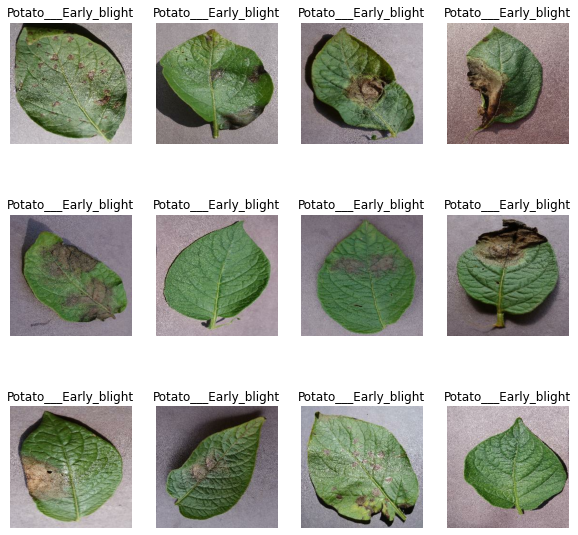

In [ ]:
plt.figure(figsize=(10,10))  #tkabbar el figure
for image_batch , label_batch in dataset.take(1): #54ina el batch lowwel
    for i in range(12):
        ax = plt.subplot(3,4,i+1) #3lh i+1 : bech el it loula iebda bel 1 wi93d kolla marra incrementi fel image elli chiplotiha
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [ ]:
#n9assmou el data mte3na ltest wtrain wvlalidation
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
    ds_size = len(ds)
    
    if(shuffle):
        ds = ds.shuffle(shuffle_size,seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds , val_ds , test_ds

In [ ]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)
len(val_ds)
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) ##autotune t5alli el tensorflow howwa elli igeri 7keyet el prefetch
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#rescale and resize the image
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),#n3mlouha bech kif nda55lou image jdida mich fel base de donne twalli el size mte3ha kif lo5rin
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#getting more data by flipping and rotating our data
data_auguementation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
#our model
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_auguementation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)), #32 is the number of filter , each filter is 3*3 matrice , last parameter is the shape of our input
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
    
])

model.build(input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=5,
    batch_size=BATCH_SIZE,
    verbose=1, #Progress bar mode. Training progress will be displayed in the console as a progress bar,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 53s 941ms/step - loss: 0.9390 - accuracy: 0.4688 - val_loss: 0.8759 - val_accuracy: 0.4688
Epoch 2/50
54/54 [==============================] - 50s 934ms/step - loss: 0.6981 - accuracy: 0.6852 - val_loss: 0.4975 - val_accuracy: 0.8177
Epoch 3/50
54/54 [==============================] - 52s 960ms/step - loss: 0.4707 - accuracy: 0.8304 - val_loss: 0.3781 - val_accuracy: 0.8594
Epoch 4/50
54/54 [==============================] - 52s 967ms/step - loss: 0.3629 - accuracy: 0.8530 - val_loss: 0.3916 - val_accuracy: 0.8802
Epoch 5/50
54/54 [==============================] - 53s 988ms/step - loss: 0.3067 - accuracy: 0.8762 - val_loss: 0.2703 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 56s 1s/step - loss: 0.2031 - accuracy: 0.9178 - val_loss: 0.3477 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 51s 939ms/step - loss: 0.2534 - accuracy: 0.8970 - val_loss: 0.2663 - val_accuracy: 0.9010
Ep

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

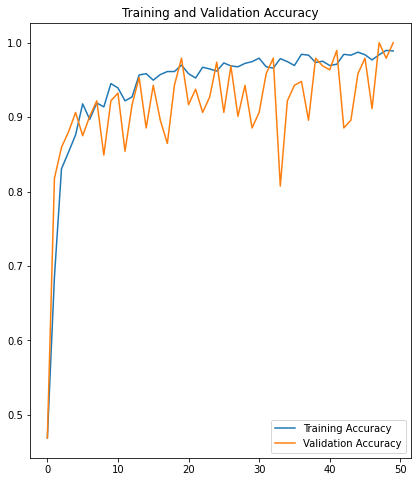

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc,label='Training Accuracy')
plt.plot(range(50),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#axe des abscisses correpond a l'epochs

In [ ]:
import numpy as np
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array,0) #this create us a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class , confidence

1/1 [==============================] - 0s 38ms/step


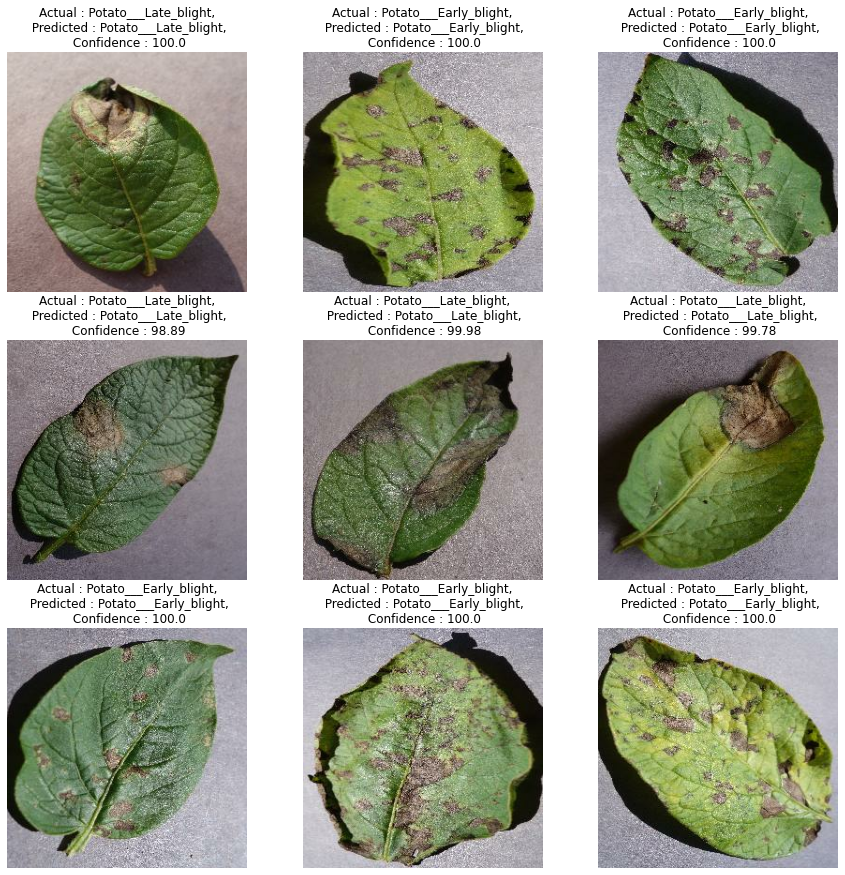

In [ ]:
plt.figure(figsize=(15, 15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint"))
        plt.axis("off")
        predicted_class , confidence = predict(model,images[i])
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class},\n Confidence : {confidence}")
        
        
        

In [ ]:
model_version =2
save_path = f"../saved_models/{model_version}.h5"

# Save the model
model.save(save_path)


NameError: name 'model' is not defined